In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import AdamW
import keras.callbacks
import keras.callbacks
import warnings
import joblib
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
df.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

In [7]:
df = df.drop(['CustomerId', 'Surname', 'id'], axis=1)

In [8]:
X = df.drop(['Exited'], axis=1)

In [9]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

In [10]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols].astype(str))

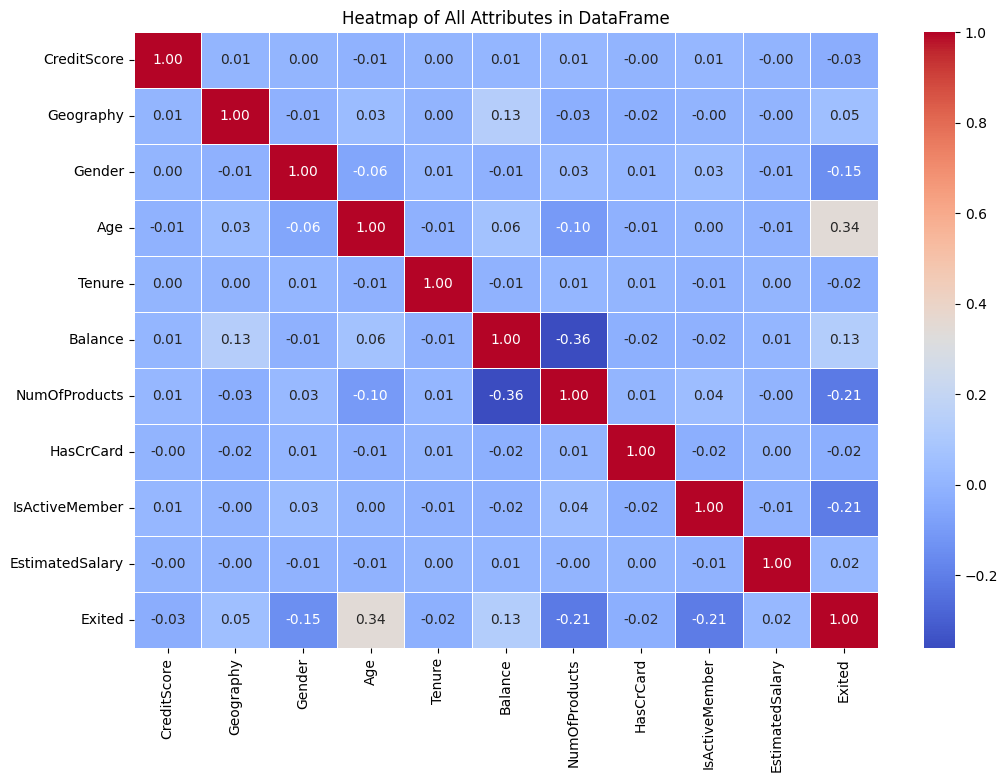

In [12]:
corr_df = df.copy()
correlation_matrix = corr_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of All Attributes in DataFrame")
plt.show()

In [13]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [14]:
model = keras.Sequential()

# Input layer
model.add(Input(shape=(X.shape[1],)))

# Hidden layers
model.add(Dense(128, activation=None))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(64, activation=None))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dense(32, activation=None))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=AdamW(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(
    X, y,
    validation_split=0.25,
    epochs=150,
    batch_size=64,
    verbose=0
)

train_loss, train_accuracy = model.evaluate(X, y, verbose=0)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

y_pred_train = (model.predict(X) > 0.5).astype("int32")
train_accuracy = accuracy_score(y, y_pred_train)

print(f"Final Train Accuracy: {train_accuracy*100:.2f}%")

Train Accuracy: 86.56%
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Final Train Accuracy: 86.56%


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [17]:
test[numerical_cols] = scaler.transform(test[numerical_cols])

In [18]:
test[categorical_cols] = ordinal_encoder.transform(test[categorical_cols].astype(str))

In [19]:
test = test.drop(['CustomerId', 'Surname', 'id'], axis=1)

In [20]:
y_pred = model.predict(test)

3439/3439 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [21]:
sub['Exited'] = y_pred

In [22]:
sub.to_csv('submission.csv', index=False)